/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


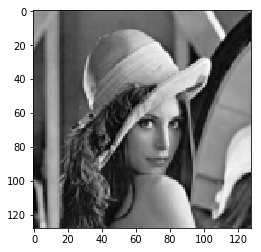

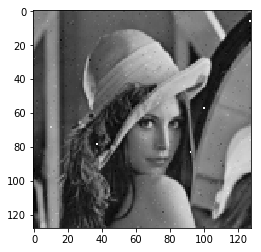

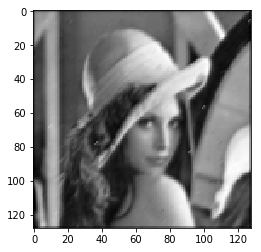

In [15]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import scipy
import scipy.misc

def read_image(name):
    image = scipy.misc.imread(name,flatten=True)
    image = scipy.misc.imresize(image,(128,128),'bilinear')
    return image
    
def show_image(image):
    plt.imshow(image,cmap=cm.gray)
    plt.show()
    
def add_noise(image, noise_percent):
    rows=image.shape[0]    
    cols=image.shape[1]    
    area=rows*cols
    loc_flip=np.random.randint(0,area,int(area*noise_percent))
    mean = 0
    variance = 10
    gauss = np.random.normal(mean,variance,area)
    for ii in loc_flip:
        locr=int(ii/cols)
        locc=(ii%cols)
        image[locr,locc]=image[locr,locc] + int(gauss[ii])
        if image[locr,locc] < 0:
            image[locr,locc] = 0
        if image[locr,locc] > 255:
            image[locr, locc] = 255
    return image

def ICM(noisy_image):
    h = 1.0
    beta = 10
    eta = 0.01
    image = noisy_image
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            image[row,col] = min_energy(noisy_image, image, row, col, h, beta, eta)
    return image
            
def min_energy(noisy_image,image,row,col,h,beta,eta):
    sub_pixel = 2*eta*noisy_image[row,col]
    main_pixel = 2*eta*noisy_image[row,col]
    if row > 0:
        if row > 1:
            sub_pixel += 2*beta*image[row-2,col]
        if col > 1:
            sub_pixel += 2*beta*image[row-1,col-1]
        if col < image.shape[1]-1:
            sub_pixel += 2*beta*image[row-1,col+1]
        sub_pixel = int(sub_pixel/(2*h+2*beta*4+2*eta))
    if col > 0:
        if col > 1:
            sub_pixel += 2*beta*image[row, col-2]
        if row > 1:
            sub_pixel += 2*beta*image[row-1, col]
        if row < image.shape[0]-1:
            sub_pixel += 2*beta*image[row+1, col-1]
        sub_pixel = int(sub_pixel/(2*h+2*beta*4+2*eta))
    if col < image.shape[1]-1:
        pixel += 2*beta*image[row,col+1]
    if row < image.shape[0]-1:
        pixel += 2*beta*image[row+1,col]
    pixel = int(pixel/(2*h+2*beta*4+2*eta))
    if pixel > 255:
        pixel = 255
    return pixel



if __name__=="__main__":
    name="/Users/johanabrahamsson/Documents/Machine learning and data science/Python/lena_gray.jpg"
    image=read_image(name)
    show_image(image)
    noisy_image=add_noise(image,noise_percent=0.10)
    show_image(noisy_image)
    denoised_image = ICM(noisy_image)
    show_image(denoised_image)

In [ ]:
def min_energy(noisy_image,image,row,col,h,beta,eta):
    pixel = 2*eta*noisy_image[row,col]
    if row > 0:
        pixel += 2*beta*image[row-1,col]
        if row > 1:
            pixel += 2*beta*image[row-2,col]
        if col > 1:
            pixel += 2*beta*image[row-1,col-1]
    if col > 0:
        pixel += 2*beta*image[row,col-1]
    if col < image.shape[1]-1:
        pixel += 2*beta*image[row,col+1]
    if row < image.shape[0]-1:
        pixel += 2*beta*image[row+1,col]
    pixel = int(pixel/(2*h+2*beta*4+2*eta))
    if pixel > 255:
        pixel = 255
    return pixel